# Diferenciální rovnice



```{admonition} Co se dozvíte v tomto textu

![](pics/Island_Fox.jpg)

V tomto textu si ukážeme, jak umí věda pracovat s modely spojujícími rychlost měnící se veličiny a hodnotu této veličiny. Zpravidla se jedná o rovnice obsahující neznámou ve formě funkce a v rovnici je i derivace této funkce. Tyto rovnice se nazývají diferenciální rovnice a jsou nejběžnějším modelovacím nástrojem napříč mnoha obory, od biologie přes ekologii a chemii až k fyzice.

Jako ukázku využití si představíme jeden z nejstarších ale dodnes užívaných ekologických modelů, model ostrovní biogeografie slavných ekologů McArthura a Wilsona. Tento model se snaží vysvětlit odlišnosti v ekosystémech na ostrovech a najít podstatu těchto odlišností. 

*Foto: Jednou z ukázek specifik ostrovních ekosystémů je vzácná endemická liška ostrovní, Urocyon littoralis. Žije na ostrovech u pobřeží Kalifornie. Autor Shanthanu Bhardwaj, <https://wikimedia.org>*
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

Model ochlazování kávy z minulé přednášky byl reprezentantem nové třídy úloh,
nazývaných diferenciální rovnice. Roli v něm hrála mimo jiné rychlost změny
teploty, tedy derivace teploty podle času. Protože se jedná o derivaci funkce
jedné proměnné, jak jsme se s ní seznámili dříve, říká se těmto rovnicím
obyčejné diferenciální rovnice. V průběhu semestru se setkáme ještě s dalším
typem derivací, parciálními derivacemi. Při jejich použití v matematických
modelech dostáváme parciální diferenciální rovnice. 

## Obyčejná diferenciální rovnice

Obyčejná diferenciální rovnice je rovnice, kde vystupuje neznámá
funkce a její derivace. Setkáváme se s ní například všude tam, kde
rychlost růstu nebo poklesu veličiny souvisí s její
velikostí. Například rychlost s jakou se mění teplota horké kávy
je funkcí teploty samotné. Rychlost tepelné výměny mezi dvěma tělesy
je totiž úměrná rozdílu jejich teplot (Newtonův zákon). Takto se
přirozeně diferenciální rovnice objevují v modelech mnoha dějů a
jevů. Podstatu děje, který modelujeme, musí dodat fyzika, biologie
nebo jiná aplikovaná věda. To v matematice obsaženo není. Matematika
poté poslouží k analýze, jaké jsou pozorovatelné důsledky a tím se
ověří, jestli příslušná aplikovaná věda správně vystihuje podstatu
modelovaného děje.

```{index} single: Diferenciální rovnice
```

```{prf:definition} Diferenciální rovnice
:nonumber:
*Obyčejnou diferenciální rovnicí prvního řádu rozřešenou vzhledem
k derivaci* (stručněji též diferenciální rovnicí, DR) s neznámou $x$
rozumíme rovnici tvaru 

$$ 
\frac{\mathrm{d}x}{\mathrm{d}t}=\varphi(t,x)
$$ (rovnice)

kde $\varphi$ je funkce
dvou proměnných.
```

Další formy zápisu rovnice {eq}`rovnice` jsou následující.
  $$x'=\varphi(t,x)$$
  $${\mathrm{d}x}=\varphi(t,x)\mathrm{d}t$$
  $${\mathrm{d}x}-\varphi(t,x)\mathrm{d}t=0$$


Diferenciální rovnice bývá v aplikacích matematickým modelem
kvantifikujícím scénář vývoje systému. Řešením jsou všechny možnosti,
jak se tento systém může vyvíjet. K jednoznačnému předpovězení
budoucího stavu je ovšem nutno znát také stav počáteční, který ze
všech teoreticky možných průběhů vybere průběh odpovídající modelované
situaci. Tento stav vyjadřuje počáteční podmínka, uvedená v
následující definici.

```{index} Počáteční podmínka
```

```{prf:definition} Počáteční podmínka, Cauchyova úloha
:nonumber:
Nechť $t_0$, $x_0$ jsou reálná čísla. Úloha najít
řešení rovnice {eq}`rovnice`, které splňuje zadanou *počáteční podmínku*

$$  
x(t_0)=x_0 
$$ (podminka)

se nazývá *počáteční* (též *Cauchyova*) *úloha*. 

Řešení Cauchyovy úlohy nazýváme též *partikulárním řešením
rovnice*. Graf libovolného partikulárního řešení se nazývá *integrální
křivka*.
```

**Příklad (praktická interpretace řešení počáteční úlohy).**

* Pokud diferenciální rovnice udává rychlost ochlazování horkého nápoje a
  počáteční podmínka teplotu na počátku, je řešením počáteční úlohy funkce, do
  které dosadíme čas a přímo dostáváme teplotu nápoje v daném čase.
* Pokud diferenciální rovnice udává rychlost růstu populace živočišného druhu v
  čase a počáteční podmínka velikost populace na počátku sledování, je řešením
  počáteční úlohy funkce, do které dosadíme čas a přímo dostáváme velikost
  populace v daném čase.


## Existence a jednoznačnost řešení

```{index} single: Věta; o jednoznačnosti
```

Jedna diferenciální rovnice má nekonečně mnoho řešení. Zpravidla je dokážeme
zapsat pomocí jediného vzorce, který obsahuje nějakou (alespoň do jisté míry
libovolnou) konstantu $C$. Takový vzorec se nazývá **obecné řešení rovnice**.
Pokud není zadána počáteční podmínka a mluvíme o **partikulárním řešení**, máme
tím na mysli jednu libovolnou funkci splňující diferenciální rovnici.

Pokud se proto bavíme o jednoznačnosti, máme tím na mysli jednoznačnost 
řešení *počáteční úlohy.*

```{prf:theorem} Existence a jednoznačnost řešení Cauchyovy úlohy
:nonumber:
Počáteční úloha 
$$
\frac{\mathrm dx}{\mathrm dt} = \varphi(t,x), \quad x(t_0)=x_0
$$
má právě jedno řešení definované v nějakém okolí počáteční podmínky, jestliže
existuje konstanta $L$ taková, že platí
$$
|\varphi(t,x_1)-\varphi(t,x_2)| \leq L|x_1-x_2|
$$
pro všechna $t$, $x_1$, $x_2$ z nějakého okolí počáteční podmínky.
```

Vlastnost z předchozí věty se nazývá Lipschitzovská spojitost. Počáteční úloha má
tedy právě jedno řešení, jestliže je funkce v okolí počáteční podmínky
Lipschitzovsky spojitá vzhledem ke druhé proměnné. (Picardova--Lindelöfova věta).
Věta dokonce umožňuje i najít interval, na kterém je jednoznačnost garantována,
viz {cite}`rab`. 


## Směrové pole

```{index} single: Směrové pole
```

```{margin} Směrové pole diferenciální rovnice
[![](https://user.mendelu.cz/marik/manim/thumbs/Slope_field.jpg)](https://user.mendelu.cz/marik/manim/Slope_field/)

Animace ukazuje tvorbu směrového pole diferenciální rovnice a jeho vztah k integrálním křivkám.
```

Derivace funkce v daném bodě udává rychlost růstu této funkce. Geometricky se
jedná o směrnici tečny. Díky tomu lze 
rovnici $$\frac{\mathrm dx}{\mathrm dt}=\varphi(t,x)$$ 
chápat jako předpis, který každému bodu v rovině $(t,x)$ přiřadí směrnici tečny
k integrální křivce, která tímto bodem prochází.  Sestrojíme-li v dostatečném
počtu (například i náhodně zvolených) bodů $[t,x]$ v rovině vektory
$(1,\varphi(t,x))$, obdržíme **směrové pole diferenciální rovnice** — systém
lineárních elementů, které jsou tečné k integrálním křivkám.

Počáteční podmínka $x(t_0)=x_0$ geometricky vyjadřuje skutečnost, že graf
příslušného řešení prochází v rovině bodem $[t_0,x_0]$. Má-li tato počáteční
úloha jediné řešení, neprochází bodem $[t_0,x_0]$ žádná další křivka. Má-li
každá počáteční úloha {eq}`rovnice`-{eq}`podminka` jediné řešení (což bude pro
nás velice častý případ), znamená to, že integrální křivky se *nikde
neprotínají*.

Následující obrázek obsahuje směrové pole rovnice $$\frac{\mathrm dx}{\mathrm dt} = x+t.$$

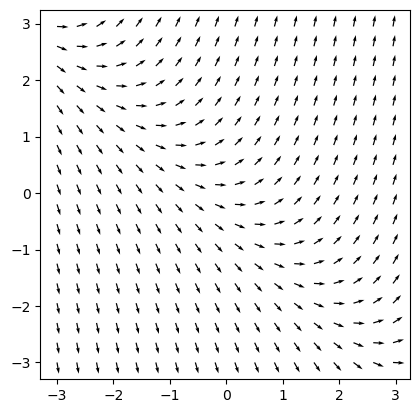

In [2]:
fig, ax = plt.subplots()
t,x = np.meshgrid(np.arange(-3,3,.35),np.arange(-3,3,.35)) # rastr pro kreslení obrázku
u = 1   
v = x+t  # pravá strana DR
n = np.sqrt(u**2+v**2)
u2, v2 = u/n, v/n  # stejná délka pro každou šipku
plt.quiver(t,x,u2,v2,angles="xy")
ax.set_aspect(1) # stejné měřítko na obou osách

## Analytické a numerické řešení

Při studiu modelu založeného na diferenciální rovnici bývá často výhodné mít k
dispozici vzorec, vyjadřující všechny funkce vyhovující rovnici nebo funkci
vyhovující rovnici i počáteční podmínce. Takové řešení se nazývá analytické
řešení. Například analytickým řešením počáteční úlohy 
$$\frac{\mathrm dT}{\mathrm dt}=-k(T-T_\infty), \quad T(0)=T_0$$
je funkce
$$T(t)=T_\infty+(T_0-T_\infty)e^{-kt}.$$
V takovém případě máme dokonce k dispozici vzorec obsahující parametry $k$ a
$T_0$ figurující v modelu a toto řešení tedy reprezentuje celou třídu různých
úloh.

Nalezení analytického řešení však někdy bývá spojeno s nemalými obtížemi, někdy
dokonce s obtížemi principiálně nepřekonatelnými. V takovém případě je možno
rovnici vyřešit numericky a najít hodnoty řešení v určitých předem zvolených
bodech. Protože diferenciální rovnice jsou základní technikou při modelování
přírodních a fyzikálních jevů, jsou k dispozici robustní a časem prověřené
techniky a algoritmy, které bývají jako knihovny zařazeny do běžných programů
umožňujících práci s těmito rovnicemi. 

Výhodou numerického přístupu je, že namísto funkčního předpisu máme řadu
numerických hodnot a s čísly se zpravidla pracuje pohodlněji než s funkcemi.
Dokonce nejčastější metoda jak získat přehled o chování funkce dané funkčním
předpisem spočívá v nakreslení grafu, což v podstatě odpovídá převedení na čísla
a znázornění těchto čísel v souřadné soustavě. Na druhou stranu, převedení na
čísla může býti nevýhodou. Například nejsme schopni postihnout závislost na
parametrech. Numerické simulace se dají dělat pro *konkrétní hodnoty parametrů*
a není možné v nich podchytit závislost na parametrech jinak, než řešit rovnici
opakovaně pro různé parametry a porovnávat vzniklá řešení.

I v případech, kdy je možné najít analytické řešení, může však být numerické
řešení užitečnější. Analytická řešení mohou být tak složitá, že z nich není ani
po bližším prozkoumání jasné, jak se systém chová. Proto se nejprve zaměříme na
numerické řešení. 

## Model ostrovní biogeografie

```{index} single: Model; ostrovní biogeografie
```

Životní prostředí podléhá neustálým změnám, ať už vlivem činnosti člověka či
vlivem jiných aspektů. V důsledku toho jsou některé živočišné či rostlinné druhy
ohroženy, jiné vymírají a jiné se naopak začínají více a více prosazovat. K
pochopení tohoto procesu může pomoci i *ostrovní ekologie* - studium vývoje
druhů na ostrovech. Z hlediska pevniny jsou totiž ostrovy relativně nestálá a
neustále se vyvíjející společenstva, vysoce citlivá na vnější zásahy, na kterých
je možno sledovat vývoj jednotlivých druhů -- jejich stability, rozmanitosti a
pod. Principy ostrovní ekologie se nevztahují pouze na ostrovy v zeměpisném
slova smyslu. Jde o jakýkoliv habitat oddělený od okolí. Například vrcholky hor
jsou ostrovy v moři stanovišť s menší nadmořskou výškou, parky jsou ostrovy
zeleně v moři městské zástavby, lesy jsou ostrovy v zemědělsky využívané
krajině, živočichové jsou ostrovy pro parazity na nich žijící a podobně.
Ostrovní ekologie je tedy nedílnou součástí ekologie jako celku i u
vnitrozemských států.

```{margin} Experimentální potvrzení teorie ostrovní biogeografie

![](./pics/island-of-mangroves.jpg)

Mac Arthurova a Wilsonova teorie přestála podrobné zkoumání a počáteční skepsi. 
Jedním z argumentů pro teorii bylo i to, že autoři podpořili svá tvrzení sérií 
experimentů s hmyzem žijícím na Kořenovníku obecném (*Rhizophora mangle*) 
na mangrovových ostrůvcích poblíž Floridy. Zde jsou stovky malých ostrůvků, kde 
vědci chemicky zničili život a sledovali opětovnou kolonizaci, nebo zmenšili 
plochu ostrůvku a sledovali změny v druhové pestrosti.
Na obrázku jsou mangrovy v Biscayne National Park, Florida. 

Zdroj: commons.wikimedia.org, Yinan Chen
```

R. H. Mac Arthur a E. O. Wilson představili v 60. letech 20. stol. následující
teorii dynamické rovnováhy počtu druhů na ostrově. Tato teorie získala veliký
ohlas a oba vědce proslavila mezi ekology, protože vysvětlovala fenomény spojené
s dynamikou populací na ostrovech, jako souvislost druhové rozmanitosti se
vzdáleností a rozlohou ostrova.  Vzhledem k možnostem aplikací teorie i na
"ostrovy" v přeneseném smyslu tohoto slova se teorie Mac Arthura a Wilsona stala
základním stavebním kamenem moderní krajinné ekologie (viz {cite}`kovar`).

Uvažujme ostrov, nacházející se relativně nedaleko pevniny -- takový,
že na něj mohou z pevniny migrovat nové druhy (větrem, přes moře,
v trusu ptáků a pod.), které na ostrově dosud nežijí. Tyto druhy se na
ostrově buď uchytí nebo neuchytí. V případě, že se druh úspěšně uchytí
a kolonizuje ostrov, může tato kolonizace být na úkor druhů jiných,
které následkem tohoto vymřou. Protože pevnina má mnohem větší nosnou
kapacitu než ostrov, slouží jako jistá zásobárna nových druhů pro
uvažovaný ostrov a ostrov je tedy neustále pod vlivem imigrace.
Protože ostrov má menší nosnou kapacitu, než mnohem rozlehlejší a
bohatší pevnina, může na něm trvale žít méně druhů než na pevnině.

Předpokládejme, že rychlost kolonizace, tj. počet druhů, které v čase
$t$ proniknou na ostrov a úspěšně se zde zabydlí, roste s počtem
imigrantů a klesá s počtem druhů, které na ostrově  již žijí. První
předpoklad je zcela přirozený, druhý vyjadřuje v ekologii obvyklé
tvrzení, že komplexnější společenstva organismů jsou stabilnější a lépe
odolávají invazi nových druhů. Počet imigrantů klesá s rostoucí
vzdáleností ostrova od pevniny, což je opět přirozený  předpoklad.
Uvedené předpoklady splňuje funkce
$$
 \frac b{D(N+\beta)},
$$
kde $N$ je počet druhů na ostrově v čase $t$, $D$ je vzdálenost ostrova od
pevniny, $\beta$ je nezáporná a  $b$ kladná konstanta. Monografie {cite}`begon`
navrhuje, že rychlost kolonizace souvisí i s rozlohou ostrova. Tato veličina by
se dala včlenit například do parametru $D$, který by potom nevyjadřoval
vzdálenost, ale vhodným způsobem by zohledňoval společný vliv vzdálenosti a
velikosti ostrova.

Předpokládejme, že rychlost vymírání  druhů, které v minulosti již úspěšně
kolonizovaly ostrov, ale neobstály v konkurenci pozdějších kolonizátorů,
roste s klesající rozlohou ostrova a s rostoucím počtem druhů na
ostrově. Tento předpoklad
je opět přirozený, vzhledem k tomu, že ostrov menší rozlohy má menší nosnou
kapacitu. Kromě toho, byl tento předpoklad prověřen i pokusy (viz
{cite}`begon`). Rychlost vymírání druhů je možné modelovat funkcí
$$
 a\frac {N^k}S,
$$
kde $S$ je rozloha ostrova a $a$ a $k$ jsou kladné konstanty.

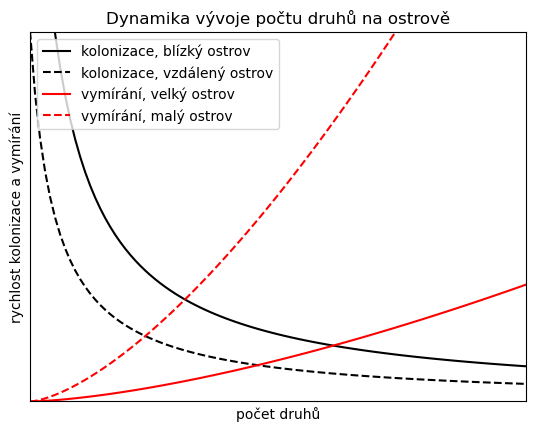

In [3]:
def kolonizace(N,b=1,beta=1,D=1):
    return b/(D*(N+beta))

def vymirani (N, S=1, a=1, k=1.4):
    return a*N**(k)/S

N = np.linspace(0,10,100)
plt.plot(N,kolonizace(N,b=10, D=1, beta=.5),"k-",label="kolonizace, blízký ostrov")
plt.plot(N,kolonizace(N,b=10, D=2, beta=.5),"k--",label="kolonizace, vzdálený ostrov")

plt.plot(N,vymirani(N, k=1.5, S = 10),"r-",label=r"vymírání, velký ostrov")
plt.plot(N,vymirani(N, k=1.5, S = 2),"r--",label=r"vymírání, malý ostrov")
plt.legend()
ax = plt.gca()
ax.set(
    ylim=(0,10), 
    xlim=(0,10),
    title="Dynamika vývoje počtu druhů na ostrově",
    xlabel="počet druhů",
    ylabel="rychlost kolonizace a vymírání",
    xticks=[],
    yticks=[]
    );

Nyní budeme pohlížet na rychlost s jakou se mění počet druhů na ostrově ze dvou
hledisek a tato hlediska nám pomůžou sestavit matematický model pro popis
dynamiky ostrova. 

* Rychlost s jakou se mění počet druhů na ostrově je derivace počtu druhů podle
  času. To je přímo význam derivace podle času.
  $$
  \frac{\mathrm dN}{\mathrm dt}
  $$
* Rychlost s jakou se mění počet druhů na ostrově je také změna počtu druhů za
  jednotku času. Tato změna se vypočítá jako rozdíl počtu druhů, které ostrov za
  jednotku času kolonizovaly a počtu druhů, které na ostrově za tuto dobu
  vymřely. Tedy půjde o rozdíl rychlosti kolonizace a rychlosti vymírání.
  $$
    \frac b{D(N+\beta)}-a\frac {N^k}S.
  $$

V předchozích bodech jsme dvakrát z různých pohledů představili stejnou veličinu
a proto se oba výrazy musí rovnat. Počet druhů na ostrově rozlohy $S$ ve
vzdálenosti $D$ od pevniny tedy vyhovuje diferenciální rovnici
$$
  \frac{\mathrm dN}{\mathrm dt}= \frac b{D(N+\beta)}-a\frac {N^k}S.
$$
Předpokládáme-li, že na počátku byl ostrov neosídlený, připojíme
podmínku $N(0)=0$.

Řešení rovnice pro jistou sadu parametrů je na následujícím obrázku.

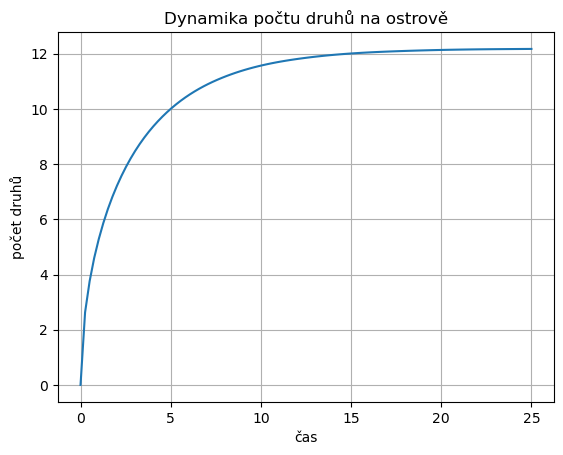

In [4]:
pocatecni_podminka = [0]
meze = [0,25]

t = np.linspace(*meze, 100) # časy ve kterých určíme hodnotu řešení
def rovnice(t, N, a=1, b=8, beta=0.2, D=0.5, k=1.3, S=20):
    return b/(D*(N+beta)) - a*N**k/S

reseni = solve_ivp(rovnice, 
                   meze, 
                   pocatecni_podminka, 
                   t_eval=t,
                   )

plt.plot(reseni.t, reseni.y.T)
ax = plt.gca()
ax.set(
    xlabel="čas",
    ylabel="počet druhů",
    title="Dynamika počtu druhů na ostrově"
)
ax.grid();

```{margin} Tři otcové teorie ostrovní biogeografie

![](./pics/Munro_McArthur_Wilson.png)

Mc. Arthur a Wilson nebyli jediní, kteří si všimli ostrovních efektů. V práci {cite}`brown` 
je poukázáno, že podobný objev uskutečnil o 15 let dříve ve své doktorské práci 
kanadský entomolog Eugene G. Munroe. 
Tomu se však vymstilo, že se svojí teorií předběhl dobu. V roce 1948 biologové ještě 
nebyli nakloněni k akceptování teorií a postupů používaných do té doby hlavně 
ve fyzice a proto Munroe nedokázal své myšlenky dostatečně zpopularizovat a 
obhájit. Roli také sehrálo to, že se ve své další kariéře věnoval 
motýlům a ne ekologii.

Na obrázku zleva Munro, Mc Arthur a Wilson.

Zdroj: wikimedia.org, M. Alma Solis
```

Všimněme si, že počet druhů ustálí na konstantní hodnotě. To znamená, že
nepřevládá ani vymírání druhů ani kolonizace, ale oba procesy jsou v rovnováze.
Tato rovnováha je dynamická. Není nijak garantováno, že druhové složení je
neměnné. V praxi dojde k tomu, že druhové bohatství (počet druhů) bude
konstantní, bude se však měnit složení druhů. 

Východiska Mac Arthurovy a Wilsonovy teorie byla potvrzena
[pokusem](https://esajournals.onlinelibrary.wiley.com/doi/full/10.1002/bes2.1347)
s ostrůvky poblíž Floridy. Ostrůvky byly zbaveny chemickou cestou bezobratlých
živočichů. Za necelý rok se druhové bohatství díky invazi z pevniny obnovilo.
Konkrétní druhové složení však bylo jiné, než před zásahem, a toto druhové
složení se neustále měnilo. Ostrůvky poblíž pobřeží hostily více druhů než ty
vzdálenější a při dodatečném umělém snížení velikosti některých ostrůvků se
jejich druhové bohatství zmenšilo. {cite}`kalas`

V roce 1883 byl opakovanými sopečnými výbuchy téměř zničen život na
ostrově u sopky Krakatoa, který leží cca $25\mathrm {km}$ od Jávy a má rozlohu
$20\,\mathrm{km}^2$. Již v roce 1921 byl tento ostrov osídlen 27 druhy ptáků.
Tento počet se v pozdějších letech již neměnil, měnila se pouze
druhová skladba. Vzhledem k tomu, že ptáci snadno pronikají na ostrov,
se poměrně rychle obnovila jejich rovnováha.  Hodnoty koeficientů v
tomto případě jsou $\frac{b}{D}=22\,\text{rok}^{-1}$, $\beta=1$ a $\frac
aS=0.03\,\text{rok}^{-1}$. Rostlin bylo na tomto ostrově v roce 1934
celkem 271 druhů, tento počet však nadále rostl. Poněkud paradoxně
může jevit fakt, že jako první se na ostrově úspěšně uchytili
mrchožraví živočichové. Tento jev je však přirozený, uvědomíme-li si,
že tito živočichové měli nejhojnější zdroje potravy v podobě mršin
živočichů neúspěšně invadujících druhů. {cite}`kalas`

Základy ostrovní ekologie nacházejí jisté uplatnění i při zakládání a udržování
rezervací, za účelem zachování druhové pestrosti. Protože, jak ukazuje ostrovní
ekologie, omezené kapacity ostrova a nízká migrace způsobí, že přežívá pouze
omezený počet druhů, je nutno "ostrovním efektům" co nejvíce zabránit. To lze
činit například zakládáním rezervací o velké rozloze. Dále je vhodné, aby v
rezervaci byl velký počet ekologických nik a remízků, kde se jednotlivé druhy
mohou uchytit (zvětší se $b$ a zmenší $a$). Je-li nutno založit rezervaci o malé
rozloze, je nutno ji podrobit velice přísnému režimu ochrany a je vhodné mít
systém rezervací, které jsou propojeny migračními cestami.


## Transformace diferenciálních rovnic

Naučíme se vyjadřovat rovnice s derivacemi v jiných proměnných tak,
aby bylo možné snížit počet parametrů v této rovnici. Pro jednoduchost
budeme uvažovat jenom případ, kdy nová proměnná je lineární funkcí
původní proměnné.

Uvažujme funkci $y$ proměnné $x$. Připomeneme si vzorce pro derivaci
součtu, derivaci konstantního násobku a derivaci složené funkce, ale
uvedeme si je v kontextu vhodném pro studium diferenciálních rovnic.

* Z derivace součtu a z derivace konstanty plyne pro funkci $y$ a konstantu $y_0$ vztah
 $$ \frac{\mathrm d (x\pm x_0)}{\mathrm dt} = \frac{\mathrm d x}{\mathrm dt} \pm \frac{\mathrm d x_0}{\mathrm dt} = \frac{\mathrm d x}{\mathrm dt} \pm 0= \frac{\mathrm d x}{\mathrm dt}.$$
* Z derivace konstantního násobku funkce plyne pro funkci $y$ a konstantu $k$ vztah
 $$ \frac{\mathrm d (kx)}{\mathrm dt} = k\frac{\mathrm d x}{\mathrm dt}.$$
* Z derivace složené funkce plyne pro konstantu $k$ a veličinu $T = kt$ vztah
  $$ \frac{\mathrm d x}{\mathrm d t} =    \frac{\mathrm d x}{\mathrm dT}   \frac{\mathrm d T}{\mathrm dt} =   \frac{\mathrm d x}{\mathrm d T} k   $$
  tj.
  $$ \frac{\mathrm d x}{\mathrm d (kt)} = \frac{\mathrm d x}{\mathrm d T} =      \frac 1k \frac{\mathrm d x}{\mathrm d t}.$$

Výše uvedené výpočty je možno shrnout do pravidla v následující poznámce.

```{prf:remark} Transformace diferenciální rovnice do jiných jednotek
:nonumber:
Pro $X=k_1(x-x_0)$ a $T=k_2 t$ platí   $$  \frac{\mathrm d X}{\mathrm d T} =   \frac{\mathrm d \Bigl(k_1(x-x_0)\Bigr)}{\mathrm d (k_2 t)} = \frac{k_1}{k_2} \frac{\mathrm dx}{\mathrm dt}.$$ Výraz nalevo neobsahuje konstanty, které jsou ve výrazu napravo. Tyto konstanty jsou v definici nových veličin $T$ a $X$. 
```

Navíc vzorec z poznámky silně připomíná klasické počítání se   zlomky. Proto
máme Leibnizův tvar zápisu derivací $\frac{\mathrm   dX}{\mathrm dT}$ při studiu
diferenciálních rovnic více v oblibě, než zápis Lagrangeův, $x'$.

```{prf:example} Bezrozměrná rovnice tepelné výměny
:nonumber:
Model tepelné výměny 
$$\frac{\mathrm dT}{\mathrm dt}=-k(T-T_\infty), \quad T(0)=T_0$$ 
obsahuje tři parametry: teplotu okolního prostředí $T_\infty$, počáteční teplotu $T_0$ a konstantu $k$ 
související s fyzikálními vlastnostmi prostředí. Postupně můžeme posunout  teplotní stupnici tak, 
aby teplota okolí byla nula a počáteční teplota jedna, tj. hodnotu $T$ snížíme o $T_\infty$ a
upravíme dílek stupnice $(T_0-T_\infty)$-krát
$$\frac{\mathrm d\left(\frac{T-T_\infty}{T_0-T_\infty}\right)}{\mathrm dt}=-k\frac{T-T_\infty}{T_0-T_\infty}$$
vydělit konstantou $k$
$$\frac{\mathrm d\left(\frac{T-T_\infty}{T_0-T_\infty}\right)}{k\mathrm dt}=-\frac{T-T_\infty}{T_0-T_\infty}$$
a přeškálovat pomocí konstanty $k$ čas
$$\frac{\mathrm d\left(\frac{T-T_\infty}{T_0-T_\infty}\right)}{\mathrm d(kt)}=-\frac{T-T_\infty}{T_0-T_\infty}.$$
Po substituci $y=\frac{T-T_\infty}{T_0-T_\infty}$, $x=kt$ má úloha tvar
$$\frac{\mathrm d y}{\mathrm d x}=-y,\quad y(0)=1.$$
Nová rovnice *neobsahuje žádné parametry* a proto je pro studium
jednodušší. Přesto je v ní obsažena veškerá informace obsažená v
rovnici původní. Tuto informaci je však nutno interpretovat v kontextu
definice nových proměnných. Například to, že všechna řešení transformované rovnice  konvergují k nule
znamená, že všechna řešení původní rovnice konvergují k $T_0$. To, že řešení transformované rovnice 
klesne na poloviční hodnotu za čas $\ln 2$ znamená, že vzdálenost řešení původní rovnice 
od rovnovážného stavu se na polovinu zmenší za čas $\frac 1k \ln 2$.
```

```{prf:remark} Nondimenzionalizace, rozměrová analýza
:nonumber:
Proces eliminace parametrů z modelu popsaného diferenciální rovnicí se nazývá
nondimenzionalizace nebo rozměrová analýza modelu, protože eliminaci parametrů
je vhodné provádět tak, aby výsledné nové veličiny vycházely bez fyzikálních
jednotek. K tomu se provádí rozbor jednotek jednotlivých veličin. V jednoduchých
případech však stačí primitivní postup popsaný v odstavcích výše a ukázaný na
příkladu. V tomto příkladě veličina $x$ nemá fyzikální jednotku, protože je
součinem konstanty $k$ (s jednotkou $\mathrm s^{-1}$) a času $t$ (s jednotkou
$\mathrm s$). Je možné ji považovat za *bezrozměrný čas*. Veličina $y$ také nemá
fyzikální jednotku, protože je podílem dvou teplot a je možné ji považovat za
*bezrozměrnou teplotu*. 
```

V úloze s ochlazováním tělesa bylo zavedení nových veličin přirozené. I u méně
zřejmých úloh zkušenosti ukazují, že je vhodné volit transformaci tak, aby
vznikly veličiny bezrozměrné, které nemají fyzikální jednotku.

```{prf:remark} Výhody transformace do bezrozměrných veličin. 
:nonumber:
Obecné výhody transformace diferenciálních rovnic jsou následující.
* Po transformaci obsahuje rovnice v nových veličinách menší množství parametrů.
* Nové veličiny jsou bez fyzikální jednotky a tudíž vhodné pro numerické simulace, 
  kdy se zpravidla o jednotky nestaráme.
* Nové veličiny zpravidla nabývají hodnot řádově srovnatelných s jedničkou. 
  Nejedná se ani o tisíce ani o tisíciny. 

Všechny tři uvedené skutečnosti vedou k tomu, že s transformovanými rovnicemi 
se lépe pracuje v numerických modelech.
```

```{margin} Makety ve zmenšeném měřítku

![](./pics/vajont.jpg)

Problematika změny jednotek je příbuzná problematice chování modelu ve zmenšeném měřítku. Díky tomu je možné některé děje zkoumat na zmenšených maketách. 

  * Dříve se napříkad zmenšené modely pro simulaci zaplavování území a působení větru na stromy či les. Ještě dnes se používají zmenšeniny letadel nebo budov při simulaci v aerodynamickém tunelu. 
  * V padesátých letech byla použita maketa přehrady Vajont v italských Alpách k předpovědi chování a následnému vysvělení katastrofy, ke které u této přehrady došlo. O tomto pojednává dokumentární film 
[Tsunami v horách](https://youtu.be/gjI23rUuofQ?t=2148) a romantický film [Vajont, šílenství mužů](https://youtu.be/H3IwAdrCdgQ?t=3612).
  * V roce 2021 byly na [zmenšeném modelu budoucí Janáčkovy koncertní síně](https://www.irozhlas.cz/kultura/desetkrat-mensi-akusticky-dokonaly-model-janackovo-centrum_2107300010_btk) studovány parametry, jaké bude mít nová brněnská koncertní síň. 

```

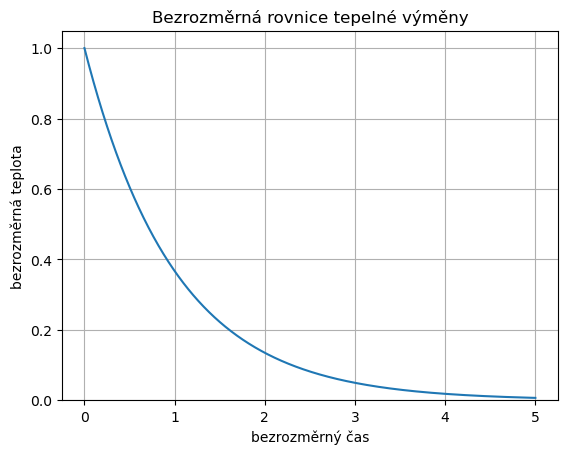

In [5]:
N = 1000
t = np.linspace(0,5,N)
dt = t[1]-t[0]
T = np.zeros(N)
T[0] = 1
for i in range(1,N):
    T[i] = T[i-1] - dt*T[i-1]
plt.plot(t,T)
plt.gca().set(
    xlabel="bezrozměrný čas",
    ylabel="bezrozměrná teplota",
    title="Bezrozměrná rovnice tepelné výměny",
    ylim=(0,None)
)
plt.grid();

```{prf:example} Bezrozměrná rovnice dynamické rovnováhy
:nonumber:
Rovnici 
$$
  \frac{\mathrm dN}{\mathrm dt}= \frac b{D(N+\beta)}-a\frac {N^k}S.
$$
rovnováhy počtu druhů na ostrově můžeme přepsat do tvaru 
$$
  \beta\frac{\mathrm d \frac N\beta}{\mathrm dt}= \frac b{D\beta} \frac 1{\frac N\beta+1}-\frac {a\beta^k}{S}\left(\frac {N}\beta\right)^k
$$
a po vydělení faktorem stojícím před prvním zlomkem na pravé straně dostáváme
$$
  \frac {\beta^2D}{b}\frac{\mathrm d \frac N\beta}{\mathrm dt}=  \frac 1{\frac N\beta+1}-\frac {a\beta^k}{S}\frac{\beta D}b\left(\frac {N}\beta\right)^k.
$$
To ukazuje, že po zavedení bezrozměrného počtu druhů $n=\frac N\beta$ a bezrozměrného 
času $\tau = \frac{b}{\beta D} \frac t\beta$ má rovnice tvar 
$$ \frac{\mathrm dn}{\mathrm d\tau}=\frac{1}{n+1}-\alpha n^k$$
závislý na exponentu $k$ a bezrozměrném parametru $\alpha = \frac{a\beta ^k}{S}\frac{\beta D}{b}.$ 

```